In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('pc.xlsx',sheet_name='Xetra Baskets')

In [3]:
list(df.iloc[0])

[nan,
 'ALTC GY Equity',
 nan,
 'WBLC GY Equity',
 nan,
 'WMEG GY Equity',
 nan,
 '21XH GY Equity',
 nan]

In [4]:
list(df.iloc[1])

['Dates',
 'TURNOVER',
 'AVERAGE_BID_ASK_SPREAD_%',
 'TURNOVER',
 'AVERAGE_BID_ASK_SPREAD_%',
 'TURNOVER',
 'AVERAGE_BID_ASK_SPREAD_%',
 'TURNOVER',
 'AVERAGE_BID_ASK_SPREAD_%']

In [5]:
col = ['Dates',
 '21Shares ALTC TURNOVER',
 '21Shares ALTC AVERAGE_BID',
 'WisdomTree WBLC TURNOVER',
 'WisdomTree WBLC AVERAGE_BID',
 'WisdomTree WMEG TURNOVER',
 'WisdomTree WMEG AVERAGE_BID',
 '21Shares 21XH TURNOVER',
 '21Shares 21XH AVERAGE_BID']

In [6]:
df.columns = col

In [7]:
df = df.iloc[2:262]

In [8]:
df.reset_index(drop=True,inplace=True)

In [9]:
df

,Dates,21Shares ALTC TURNOVER,21Shares ALTC AVERAGE_BID,WisdomTree WBLC TURNOVER,WisdomTree WBLC AVERAGE_BID,WisdomTree WMEG TURNOVER,WisdomTree WMEG AVERAGE_BID,21Shares 21XH TURNOVER,21Shares 21XH AVERAGE_BID
0,2021-05-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-05-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-05-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-05-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-05-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
255,2022-04-25 00:00:00,6689.68,1.1247,10066.84,1.4488,2937.88,0.5962,217429.7,0.3642
256,2022-04-26 00:00:00,92098.52,0.9307,8171.25,1.0665,1940.15,0.5099,39059.54,0.3704
257,2022-04-27 00:00:00,37051.61,0.8892,29989.04,1.4019,45966.59,0.5287,61927.2,0.3676
258,2022-04-28 00:00:00,7209.92,1.0232,51503.14,1.1997,32.2,0.5202,44101.71,0.3695


In [10]:
df.isna().sum()

Dates                            0
21Shares ALTC TURNOVER         152
21Shares ALTC AVERAGE_BID      150
WisdomTree WBLC TURNOVER       151
WisdomTree WBLC AVERAGE_BID    150
WisdomTree WMEG TURNOVER       152
WisdomTree WMEG AVERAGE_BID    150
21Shares 21XH TURNOVER         103
21Shares 21XH AVERAGE_BID      103
dtype: int64

In [11]:
df['Dates'] = pd.to_datetime(df['Dates'])

In [12]:
df.dtypes

Dates                          datetime64[ns]
21Shares ALTC TURNOVER                 object
21Shares ALTC AVERAGE_BID              object
WisdomTree WBLC TURNOVER               object
WisdomTree WBLC AVERAGE_BID            object
WisdomTree WMEG TURNOVER               object
WisdomTree WMEG AVERAGE_BID            object
21Shares 21XH TURNOVER                 object
21Shares 21XH AVERAGE_BID              object
dtype: object

In [13]:
for col in list(df)[1:]:
    df[col] = df[col].astype('float')

In [14]:
df.dtypes

Dates                          datetime64[ns]
21Shares ALTC TURNOVER                float64
21Shares ALTC AVERAGE_BID             float64
WisdomTree WBLC TURNOVER              float64
WisdomTree WBLC AVERAGE_BID           float64
WisdomTree WMEG TURNOVER              float64
WisdomTree WMEG AVERAGE_BID           float64
21Shares 21XH TURNOVER                float64
21Shares 21XH AVERAGE_BID             float64
dtype: object

In [15]:
df['Year'] = df['Dates'].dt.year 
df['Month'] = df['Dates'].dt.month 

In [16]:
dict_mnth = {
    1:'JAN',
    2:'FEB',
    3: 'MARCH',
    4: 'APRIL',
    5: 'MAY',
    6: 'JUNE',
    7: 'JULY',
    8: 'AUG',
    9: 'SEP',
    10: 'OCT',
    11: 'NOV',
    12: 'DEC'
}

# Turnover

In [17]:
turnover_col = [name for name in list(df) if 'TURNOVER' in name]
df_new = df.groupby(['Year','Month'])[turnover_col].sum()
df_new = df_new.reset_index()

In [18]:
df_new

,Year,Month,21Shares ALTC TURNOVER,WisdomTree WBLC TURNOVER,WisdomTree WMEG TURNOVER,21Shares 21XH TURNOVER
0,2021,5,0.00,0.00,0.00,0.00
1,2021,6,0.00,0.00,0.00,0.00
2,2021,7,0.00,0.00,0.00,0.00
3,2021,8,0.00,0.00,0.00,0.00
4,2021,9,0.00,0.00,0.00,748198.12
5,2021,10,0.00,0.00,0.00,9061174.74
6,2021,11,0.00,19376.54,0.00,17326887.90
7,2021,12,729169.84,504450.59,1229164.42,10883809.40
8,2022,1,1159703.14,714423.80,782233.41,13459998.90
9,2022,2,484292.48,573326.72,341157.60,6605454.30


In [19]:
yr_month = []
for _,row in df_new.iterrows():
    
    yr_month.append(str(row['Year']).split('.')[0]+'_'+dict_mnth[row['Month']])
    
df_new['yr_month'] = yr_month

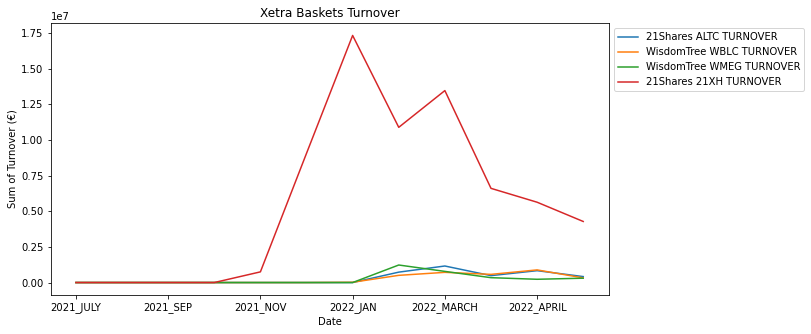

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
# turnover_col = [name for name in list(df_new) if 'TURNOVER' in name]
new_name = df_new['yr_month'].iloc[[0,2,4,6,8,10,11]]
for col in turnover_col:
    ax.plot(list(range(len(df_new))),list(df_new[col]),label=col)
ax.set_xticklabels(new_name)
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.title("Xetra Baskets Turnover")
plt.xlabel("Date")
plt.ylabel("Sum of Turnover (€)")
plt.savefig("xetrabaskets_turnover.png", bbox_inches = "tight")
plt.show()

# Average bid

In [21]:
bid_col = [name for name in list(df) if 'AVERAGE_BID' in name]

In [22]:
df_bid = df.groupby(['Year','Month'])[bid_col].mean()*100
df_bid = df_bid.reset_index()

In [23]:
df_bid

,Year,Month,21Shares ALTC AVERAGE_BID,WisdomTree WBLC AVERAGE_BID,WisdomTree WMEG AVERAGE_BID,21Shares 21XH AVERAGE_BID
0,2021,5,NaN,NaN,NaN,NaN
1,2021,6,NaN,NaN,NaN,NaN
2,2021,7,NaN,NaN,NaN,NaN
3,2021,8,NaN,NaN,NaN,NaN
4,2021,9,NaN,NaN,NaN,59.208333
5,2021,10,NaN,NaN,NaN,65.616190
6,2021,11,65.785000,67.395000,34.180000,48.175455
7,2021,12,66.270000,64.537391,31.436957,49.418696
8,2022,1,78.323333,75.092857,30.988095,50.942381
9,2022,2,106.092000,96.984000,47.469000,57.138000


In [24]:
c = ['gold','c','darkgreen','g','b','lightblue','darkblue','brown','grey']

In [25]:
len(bid_col)

4

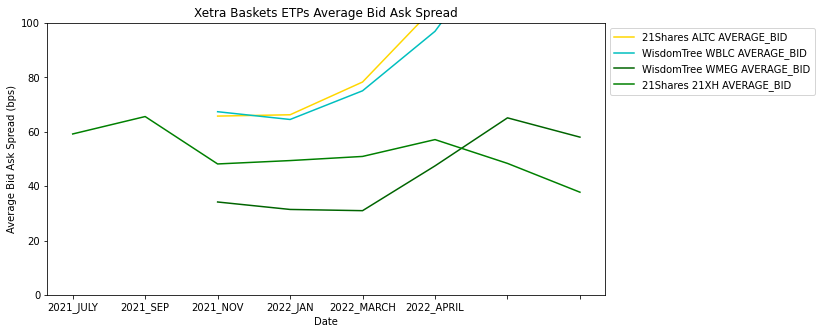

In [26]:
fig, ax = plt.subplots(figsize=(10,5))
new_name = df_new['yr_month'].iloc[[0,2,4,6,8,10,11]]
for i,col in enumerate(bid_col):
    ax.plot(list(range(len(df_bid))),list(df_bid[col]),label=col,color=c[i])
ax.set_xticklabels(new_name)
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.title("Xetra Baskets ETPs Average Bid Ask Spread")
plt.xlabel("Date")
plt.ylabel("Average Bid Ask Spread (bps)")
plt.ylim([0,100])
plt.savefig("xetrabaskets_bid_ask.png")
plt.show()